<h1 style = "color:orange;" dir = "ltr"> <b>
    Introduction to Artificial Intelligence - CA1
</b> </h1>
<h1 style = "color:orange;" dir = "ltr"> <b>
    Mahdi Naieni - 810101536
</b> </h1>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Genetic Algorithm
</b> </h1>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Project Summary and Objectives:
</b> </h1>

This project aims to address a variant of the classic knapsack problem, incorporating additional constraints, by leveraging the power of genetic algorithms. The core challenge involves optimizing the selection of items under four specific conditions: 
- The number of items chosen must fall within a predefined range.
- The total value of selected items must exceed a minimum value threshold.
- The cumulative weight of selected items must not exceed a maximum weight limit.
- Each selected item must not exceed its individual weight limit.

To tackle this enhanced version of the knapsack problem using genetic algorithms, the following steps are crucial:
1. **Defining Genes**: Establish a chromosome representation that encapsulates the 
    decision of including or excluding each item, ensuring it aligns with the problem's
    requirements
2. **Crossover and Mutation**: Implement crossover and mutation operations with appropriate 
    probabilities to enhance the diversity and quality of the population over generations.
3. **Fitness Function**: Design a fitness function that accurately reflects the success of a 
    solution based on the constraints outlined above, ensuring that the algorithm's evolutionary 
    process is guided towards optimal solutions.
4. **Hyperparameter Tuning**: Evaluate and adjust the genetic algorithm's hyperparameters, 
    including crossover and mutation rates, to improve the algorithm's performance and convergence 
    towards a high-quality solution. 

This project not only explores the application of genetic algorithms to solve complex optimization problems but also delves into the intricacies of defining a fitness function and tuning the algorithm's parameters to achieve effective solutions.

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Hyperparameters Overview:
</b> </h1>

Hyperparameters play a pivotal role in the optimization of solutions using genetic algorithms, particularly in scenarios where the optimal solution is not readily apparent due to the complexity and variability of the data involved. Adjusting these parameters is crucial for enhancing the algorithm's ability to find superior solutions. Below are the hyperparameters tailored for this specific project:

- **file_name**: We use a CSV file to extract data for problem-solvin.
- **range_of_snacks**: Defines the minimum and maximum number of items that must be selected as part of the solutio.
- **min_value**: Indicates the minimum total value that the selected items must achieve.
- **max_weight**: Specifies the maximum cumulative weight of items that can be included in the solution.
- **num_of_samples**: Determines the number of chromosomes (solutions) in each generation.
- **num_of_cycle**: Sets the number of generations to be produced before stopping the algorithm to find an optimal solution.
- **crossover_rate**: Defines the rate at which crossover operations are performed between chromosomes to generate new offspring.
- **mutation_rate**: Specifies the probability of mutation occurring in the genetic algorithm process, affecting the modification of individual genes.

These hyperparameters are meticulously chosen to guide the genetic algorithm towards finding the best possible solution within the constraints of the knapsack problem, emphasizing the importance of tailoring these parameters to the specific problem at hand

In [24]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

file_name = "snacks.csv"
range_of_snacks = (19,19)
min_value = 90
max_weight = 80

crossover_rate = 0.95
mutation_rate = 0.05

num_of_sample = 120
num_of_cycle = 100

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    Explanation of Chromosomes and Genes:
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    Considering the constraints that the chromosome's length must remain constant and the number of foods is also fixed, we can conceptualize the chromosome as an array of all available foods. Each food is characterized by a specific variable that specifies the quantity of that food to be included in the solution. Hence, in this context, genes symbolize the quantities of food that can be incorporated, effectively mapping to the variable quantities of food items.
</p>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    Fitness Function: 
</b> </h1>
This function computes the fitness value based on three weight coefficients: factor_weight for weight, factor_value for value, and factor_items for items. 

- **factor_weight** = The difference with the weight limit
- **factor_value** = The difference with the value limit
- **factor_items** = The difference with the number of meals limit

These coefficients are calculated within the function to ensure an accurate representation of the fitness landscape. The final fitness score is derived from a specific equation that incorporates these coefficients, reflecting the balance between weight, value, and the number of items selected.

$$
fitness = \frac{\left (\sum value \right )^{2}}{\left ( \sum weight \right )^{1}} \times \frac{1}{factor_{weight}} \times \frac{1}{factor_{value}}\times \frac{1}{factor_{items}} 
$$

In [25]:
class Part:
    def __init__(self,part_list) -> None:
        self.lst = part_list
        self.score = 0
        self.total_weight = sum(self.lst)
        self.total_value = 0
        self.count = 0

    def copy(self):
        new_lst = []
        for x in self.lst:
            new_lst.append(x)
        new_copy = Part(new_lst)
        new_copy.score = self.score
        new_copy.total_value = self.total_value
        new_copy.total_weight = self.total_weight
        new_copy.count = self.count
        return new_copy
    
    def find_fitness(self, snacks_list, max_weight, min_value, range_of_snacks):
        sum_weight = sum(self.lst)
        num_of_snacks = 0
        sum_values = 0
        factor_items = 1
        factor_value = 1
        factor_weight = 1
        for i in range(len(self.lst)):
            sum_values += (self.lst[i] / snacks_list[i].weight) * snacks_list[i].value
            if self.lst[i] != 0:
                num_of_snacks += 1
        if num_of_snacks < range_of_snacks[0]:
            factor_items = range_of_snacks[0] - num_of_snacks + 1
        elif num_of_snacks > range_of_snacks[1]:
            factor_items = num_of_snacks - range_of_snacks[1] + 1
        if sum_values < min_value:
            factor_value = (min_value - sum_values + 1)
        if sum_weight > max_weight:
            factor_weight = (sum_weight - max_weight + 1)

        if sum_weight * factor_items * factor_value * factor_weight > 0:
            self.score = ((sum_values)**2) / ((sum_weight)**1 * factor_items * factor_value * factor_weight)
        else: 
            self.score = 0
        self.total_weight = sum_weight
        self.total_value = sum_values
        self.count = num_of_snacks

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    Input Data: 
</b> </h1>

In [26]:
snacks = pd.read_csv("snacks.csv")
print(snacks)

            Snack  Available Weight  Value
0          MazMaz                10     10
1   Doogh-e-Abali                15     10
2            Nani                 5      5
3            Jooj                 7     15
4         Hot-Dog                20     15
5           Chips                 8      6
6        Nooshaba                12      8
7        Shokolat                 6      7
8       Chocoroll                 9     12
9         Cookies                11     11
10        Abnabat                 4      4
11   Adams-Khersi                14      9
12        Popcorn                16     13
13         Pastil                 3      7
14       Tordilla                10      9
15       Masghati                 5      6
16        Ghottab                 7     10
17   Saghe-Talaei                 9     11
18    Choob-Shoor                13     12


In [27]:
snacks.describe()

,Available Weight,Value
count,19.000000,19.000000
mean,9.684211,9.473684
std,4.497563,3.168744
min,3.000000,4.000000
25%,6.500000,7.000000
50%,9.000000,10.000000
75%,12.500000,11.500000
max,20.000000,15.000000


<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    Data Reading Process: 
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    Snack class is designed to manage the attributes of each food item provided in the input, including its name, weight, and value. The data from a CSV file has been successfully loaded, and an instance of the Stack class has been created to store each food item's weight, name, and value. These details are then appended to a list of foods, facilitating easy access and manipulation of the data.
</p>
<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    First Generation: 
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    meke_random_samples: This function initializes the first generation by randomly selecting a number of genes (ensuring they fall within the permissible range) and assigning each gene a random weight. The generation is then populated with these randomly generated genes, setting the stage for the evolutionary process.
</p>
<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    Crossover Operator Explanation: 
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    The crossover function employs a one-point crossover technique. This method involves selecting a random crossover point on the chromosomes of the two parent organisms. The genetic material to the right of this point is then swapped between the parent chromosomes, resulting in two new offspring. Each offspring inherits genetic information from both parents, ensuring diversity and potential improvement in the population's genetic pool.
</p>
<p dir = "ltr" style="text-align: justify"> 
    To enhance the clarity and effectiveness of this crossover operation, it's beneficial to ensure that the crossover point is chosen in a way that avoids potential issues with illegal offspring or reduced genetic diversity. This can be achieved by incorporating additional checks or adjustments to the crossover point selection process. For instance, ensuring that the crossover point does not result in an offspring that violates the problem's constraints (e.g., exceeding the maximum weight limit) can be crucial
</p>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    Mutation Operator Explanation: 
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    The mutation function alters each gene independently with a probability (p_m), where (p_m) is referred to as the mutation rate. This process introduces variability into the population, potentially leading to the discovery of new, potentially better solutions. The mutation rate is a critical parameter that balances exploration of the solution space with exploitation of known good solutions
    </br>
    Typically mutation is rate between 1/pop_size and 1/ chromosome_length.
</p>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    Ranking Samples: 
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    This function assesses the fitness of each chromosome, as previously described, and then organizes them in descending order based on their fitness scores.
</p>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    New Generation:
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    In the new generation process, the probability for each chromosome is calculated based on its rank, taking into account the need to increase the selection probability for chromosomes with very low fitness. This approach ensures a more balanced selection process, as chromosomes with lower fitness have a higher chance of being selected for the next generation. Subsequently, the chromosomes are chosen for the next generation based on their calculated probabilities, promoting diversity and exploration within the population.
</p>

$$
    P_{i} = \frac{n - i+1}{\sum_{k=1}^{n}k}
$$

<p dir = "ltr" style="text-align: justify"> 
    In summary, by calculating selection probabilities based on chromosome rank and fitness and employing a roulette wheel selection mechanism, the genetic algorithm can more effectively manage the exploration and exploitation trade-off, leading to improved performance and more robust solutions.
</p>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    Genetic Algorithm Process:
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    The "do_genetic_algorithm()" function orchestrates the evolution of populations through a series of iterations, leveraging the previously defined methods to generate new populations until reaching the desired number of iterations. Each iteration follows a structured process:
</p>

- **Crossover**: This step combines the genetic material of two parent chromosomes to produce offspring. The crossover mechanism is crucial for introducing genetic diversity and exploring new solutions by combining the best features of both parents. The crossover probability, which determines the likelihood of crossover occurring, plays a vital role in balancing the exploration of new solutions with maintaining the genetic integrity of the population
- **Mutation**: Following crossover, mutation introduces random changes to the offspring's genetic material. This step is essential for maintaining genetic diversity and preventing the algorithm from converging to suboptimal solutions. The mutation probability, which controls the likelihood of mutation, should be carefully adjusted to avoid excessive mutation that could lead to loss of genetic quality
- **Rank Calculation**: Each chromosome in the population is evaluated to determine its fitness, and the population is then ranked based on these fitness scores. This ranking system is critical for the selection process, as it guides the algorithm in choosing which chromosomes are most likely to produce offspring for the next generation.
- **Selection**: Based on the fitness ranks, chromosomes are selected for reproduction. The selection mechanism ensures that chromosomes with higher fitness have a higher chance of being chosen as parents for the next generation. Various selection strategies, such as tournament selection or proportional roulette wheel selection, can be employed to achieve this.
- **Formation of New Population**: The selected chromosomes undergo crossover and mutation to produce the next generation. This iterative process of selection, crossover, mutation, and ranking continues until the specified number of iterations is reached or a termination condition is met, such as achieving a satisfactory fitness level or observing no significant improvement over generations

<p dir = "ltr" style="text-align: justify"> 
    By following this structured process, the do_genetic_algorithm function effectively evolves populations of solutions, leveraging the principles of crossover, mutation, and selection to navigate the solution space and find optimal or near-optimal solutions.
</p>

In [28]:
class Snack:
    def __init__(self,name,weight,value) -> None:
        self.name = name
        self.weight = weight
        self.value = value

class Genetic:
    def __init__(self,file_name,max_weight,min_value,range_of_snacks) -> None:
        file = pd.read_csv(file_name)
        self.snacks_list = list()
        names = file["Snack"].values.tolist() 
        weights = file["Available Weight"].values.tolist()
        values = file["Value"].values.tolist()
        for i in range(len(names)):
            self.snacks_list.append(Snack(names[i],weights[i],values[i]))
        self.max_weight = max_weight
        self.min_value = min_value
        self.range_of_snacks = range_of_snacks
        self.snacks_number = len(self.snacks_list)
    
    def meke_random_samples(self,num_of_samples):
        number_of_snacks = len(self.snacks_list)
        random_step = 0.01
        samples = list()
        for _ in range(num_of_samples):
            temp = [0]*number_of_snacks
            count = random.randint(range_of_snacks[0],range_of_snacks[1])
            random_index = random.sample(range(0,number_of_snacks),count)
            for index in random_index:
                all_values = np.arange(random_step, self.snacks_list[index].weight + random_step, random_step)
                temp[index] = np.random.choice(all_values)
            samples.append(Part(temp))
        return samples

    def do_crossover(self, samples):
        number_of_snacks = len(self.snacks_list)
        np.random.seed(10) 
        p_chanse = 0.05
        p_chanse = 1/number_of_snacks
        random_outcomes = bernoulli.rvs(p_chanse, size= len(samples))
        for i in range(0,len(samples),2):
            if not(random_outcomes[i]):
                idx = random.randint(0,number_of_snacks-1)
                temp = samples[i].lst[idx:]
                samples[i].lst[idx:] = samples[i+1].lst[idx:]
                samples[i+1].lst[idx:] = temp
        return samples

    def do_mutation(self, samples):
        p_chanse = 0.02
        random_step = 0.01
        snack_numbers = len(samples[0].lst) 
        random_outcomes = bernoulli.rvs(p_chanse, size= len(samples) * snack_numbers)
        for i in range(len(samples)):
            for j in range(snack_numbers):
                if random_outcomes[i * snack_numbers + j]:
                    all_values = np.arange(random_step, self.snacks_list[j].weight + random_step, random_step)
                    samples[i].lst[j] = np.random.choice(all_values)
        return samples

    def rank_samples(self, samples):
        for i in range(len(samples)):
            samples[i].find_fitness(self.snacks_list, self.max_weight, self.min_value, self.range_of_snacks)
        samples.sort(key= lambda x: x.score, reverse= True)
        return samples

    def make_new_generation(self,samples):
        len_samp = len(samples)
        p_sample = []
        denominator = (len_samp * (len_samp + 1)) / 2
        for i in range(len_samp):
            p_sample.append((len_samp - i) / denominator)
        index_list = np.random.choice(len_samp,len_samp,p= p_sample)
        new_samples = []
        for index in index_list:
            new_samples.append(samples[index].copy())
        new_samples.sort(key= lambda x: x.score, reverse= True)
        return new_samples

    def do_genetic_algorithm(self,num_of_samples,num_of_cycle,cross_flag,mutation_flag,progress_flag):
        samples = self.meke_random_samples(num_of_samples)
        datas = []
        for i in range(num_of_cycle):
            bar = int((40 * (i+1)) / num_of_cycle)
            if progress_flag:
                print( '\r' + "|" + u"\u2588" * int(bar) + "-" * (40 - bar) + f"| {i+1}/{num_of_cycle} [{int(100 * (i+1) / num_of_cycle)}%]",end= "")
            if cross_flag:
                samples = self.do_crossover(samples)
            if mutation_flag:
                samples = self.do_mutation(samples)
            samples = self.rank_samples(samples)
            samples = self.make_new_generation(samples)
            values = [instance.score for instance in samples]
            datas.append(np.mean(values))
        return datas, samples[0]

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Project Execution Summary
</b> </h1>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    Find A Solution To The Problem: 
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    I instantiated the "Genetic" module and invoked the "do_genetic_algorithm()" method. It's important to note that due to the probabilistic nature of genetic algorithms, a solution that is both optimal and valid is not guaranteed to be generated every time the algorithm is run. This is a characteristic of genetic algorithms, which rely on randomness and stochastic processes to explore the solution space.
</p>
<p dir = "ltr" style="text-align: justify"> 
    I printed the best solution found (the one with the highest fitness value in the final iteration) and visualized the evolution of average fitness scores across all generations. This visualization helps in understanding the algorithm's performance over time, showing whether the population's fitness is improving or stabilizing.
</p>

|████████████████████████████████████████| 47/47 [100%]
answer: 
count= 19 
weight= 79.45 
value= 94.81


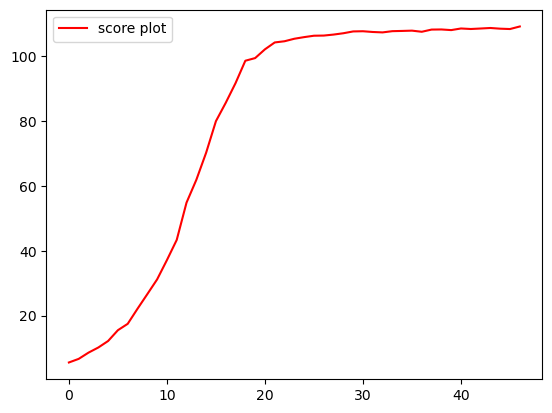

[8.37, 0.22, 1.77, 6.7299999999999995, 1.3800000000000001, 1.3800000000000001, 1.6300000000000001, 4.47, 6.38, 8.53, 2.25, 0.62, 4.01, 2.88, 3.96, 4.21, 5.87, 4.7299999999999995, 10.06]


In [29]:
gen = Genetic(file_name,max_weight,min_value,range_of_snacks)
num_of_samples = 10*gen.snacks_number
num_of_cycle = int(2.5*gen.snacks_number)
answers = []
datas, ans = gen.do_genetic_algorithm(num_of_samples,num_of_cycle,True,True,True)
print("\n" + "answer: \n" + f"count= {ans.count} \n" + f"weight= {ans.total_weight:.2f} \n" + f"value= {ans.total_value:.2f}")
plt.plot(np.arange(0,num_of_cycle,1), datas, color= "red", label= "score plot")
plt.legend()
plt.show()
print(ans.lst)

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b> 
    Analysis of Results: 
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    Upon concluding my study, I examined the efficacy of the genetic algorithm in the context of its use of crossover and mutation. By charting the results of these operations, I found that the incorporation of both crossover and mutation facilitates the achievement of optimal outcomes.
</p>
<p dir = "ltr" style="text-align: justify"> 
    both mutation and crossover are complementary and contribute to the overall performance of the genetic algorithm. The balance between crossover and mutation is crucial and can significantly impact the algorithm's ability to find optimal or near-optimal solutions. Too much emphasis on crossover without mutation might lead to premature convergence to suboptimal solutions, while too much mutation without crossover could result in a loss of diversity and a lack of exploration of the solution space.
</p>
<p dir = "ltr" style="text-align: justify"> 
    To further enhance the analysis, it's beneficial to consider the balance and application of crossover and mutation in the genetic algorithm. The mutation and crossover rates, which determine the likelihood of these processes occurring, are crucial parameters that can significantly impact the algorithm's performance.
</p>

|████████████████████████████████████████| 15/15 [100%]

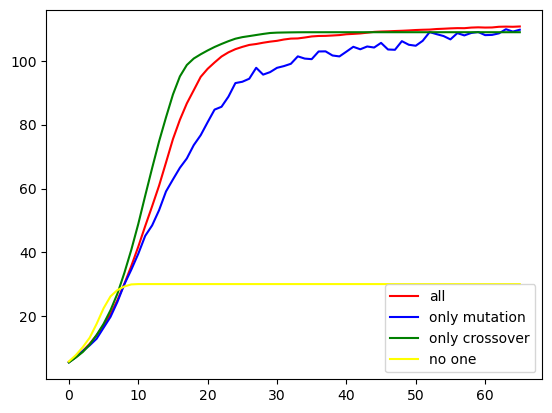

In [30]:
gen = Genetic(file_name,max_weight,min_value,range_of_snacks)
num_of_samples = 10*gen.snacks_number
num_of_cycle = int(3.5*gen.snacks_number)
num_of_simulation = 15

simulation_normal = [[0 for i in range(num_of_simulation)] for j in range(num_of_cycle)]
simulation_mutation = [[0 for i in range(num_of_simulation)] for j in range(num_of_cycle)]
simulation_cross = [[0 for i in range(num_of_simulation)] for j in range(num_of_cycle)]
simulation_empty = [[0 for i in range(num_of_simulation)] for j in range(num_of_cycle)]


for i in range(num_of_simulation):
    bar = int((40 * (i+1)) / num_of_simulation)
    if i == 0:
            print( '\r' + "|" + "-" * (40) + f"| 0/{num_of_simulation} [0%]",end= "")
    datas_normal, ans = gen.do_genetic_algorithm(num_of_samples,num_of_cycle,True,True,False)
    datas_mutation, ans = gen.do_genetic_algorithm(num_of_samples,num_of_cycle,False,True,False)
    datas_cross, ans = gen.do_genetic_algorithm(num_of_samples,num_of_cycle,True,False,False)
    datas_empty, ans = gen.do_genetic_algorithm(num_of_samples,num_of_cycle,False,False,False)
    for j in range(num_of_cycle):
        simulation_normal[j][i] = datas_normal[j]
        simulation_mutation[j][i] = datas_mutation[j]
        simulation_cross[j][i] = datas_cross[j]
        simulation_empty[j][i] = datas_empty[j]
    print( '\r' + "|" + u"\u2588" * int(bar) + "-" * (40 - bar) + f"| {i+1}/{num_of_simulation} [{int(100 * (i+1) / num_of_simulation)}%]",end= "")

mean_normal = [np.mean(x) for x in simulation_normal]
mean_mutation = [np.mean(x) for x in simulation_mutation]
mean_cross = [np.mean(x) for x in simulation_cross]
mean_empty = [np.mean(x) for x in simulation_empty]

plt.plot(np.arange(0,num_of_cycle,1), mean_normal, color= "red", label= "all")
plt.plot(np.arange(0,num_of_cycle,1), mean_mutation, color= "blue", label= "only mutation")
plt.plot(np.arange(0,num_of_cycle,1), mean_cross, color= "green", label= "only crossover")
plt.plot(np.arange(0,num_of_cycle,1), mean_empty, color= "Yellow", label= "no one")
plt.legend()
plt.show()

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Questions
</b> </h1>

<p style = "color:green" dir = "ltr"> <b> 
    1. What problems do very small or very large initial populations create?
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    When the population size is significantly large, the algorithm may experience extended convergence times. Conversely, if the population size is very small, the algorithm may struggle to find the optimal solution due to insufficient diversity within the population. This analysis highlights the delicate balance required in selecting an appropriate population size for genetic algorithms.
</p>
<p dir = "ltr" style="text-align: justify"> 
    In practice, population sizes are often chosen within a range of 50 to 500 individuals, with the exact number depending on the specific problem and the algorithm's design. This range is considered a compromise that balances the need for diversity with the computational resources availabl
</p>

<p style = "color:green" dir = "ltr"> <b> 
    2. If the population size increases in each generation, what impact does it have on the accuracy and speed of the algorithm?
</b> </h1>

- Accuracy: With a larger population, the algorithm has a broader range of potential solutions to explore, which can increase the chances of finding a better solution. 

- Speed: On the other hand, a larger population size can lead to longer convergence times and increased computational complexity. This is because the algorithm needs to evaluate and select from a larger number of individuals in each generation, which requires more computational resources and time. Additionally, as the population size grows, the diversity of solutions within the population may decrease, potentially slowing down the search for the optimal solution.


<p style = "color:green" dir = "ltr"> <b> 
    3. What are the effects and comparisons of each operation, crossover and mutation? Can only one of them be used? Why?
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    In genetic algorithms, both crossover and mutation play pivotal roles in the evolution of the population.
</p>

- Crossover: This operation combines the genetic material of two parent chromosomes to produce offspring. It is crucial for introducing diversity into the population and exploring new areas of the solution space.By mixing the genetic traits of parents, crossover can lead to the creation of novel solutions that may not have been possible through mutation alone. 
    
- Mutation: Mutation introduces random changes to the genetic material of chromosomes. It is essential for maintaining genetic diversity and preventing the algorithm from converging prematurely to suboptimal solutions. Mutation can introduce new genetic material that might lead to better solutions, especially when combined with crossover

<p dir = "ltr" style="text-align: justify"> 
    both are complementary and contribute to the overall performance of the genetic algorithm. The balance between crossover and mutation is crucial and can significantly impact the algorithm's ability to find optimal or near-optimal solutions. Too much emphasis on crossover without mutation might lead to premature convergence to suboptimal solutions, while too much mutation without crossover could result in a loss of diversity and a lack of exploration of the solution space
</p>

<p style = "color:green" dir = "ltr"> <b> 
    4. Do you think there are any specific strategies for reaching an answer faster in this particular problem?
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    By calculating the value per gram of each food item by dividing its value by its weight, we can rank foods based on their nutritional density. This method enables us to select foods with higher nutritional values more frequently in the initial generation, optimizing the algorithm's selection process for better solutions.
</p>

<p style = "color:green" dir = "ltr"> <b> 
    5. Despite the use of these methods, chromosomes may still not change after several steps. Explain the reason for this occurrence and the problem it creates. What suggestions do you have to solve it?
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    Despite the use of crossover and mutation methods in genetic algorithms, chromosomes may not change after several steps. This phenomenon can occur for several reasons, including the mutation rate being too low, leading to insufficient diversity in the population. Additionally, if the algorithm converges prematurely to a suboptimal solution, further mutations may not significantly alter the chromosomes, as the algorithm may be stuck in a local optimum rather than exploring the solution space more broadly.
</p>
<p dir = "ltr" style="text-align: justify"> 
    To solve this problem, we can consider the following suggestions:
</p>

- Increase the Mutation Rate: Adjusting the mutation rate to a higher value can introduce more diversity into the population, increasing the chances of significant changes in chromosomes. However, care must be taken not to set the mutation rate too high, as this could lead to excessive changes that degrade the quality of solutions.
- Adaptive Mutation Rate: Implementing an adaptive mutation rate that changes over generations can help maintain a balance between exploration and exploitation. For example, increasing the mutation rate in the early generations can help the population explore a wide range of solutions, while decreasing it in later generations can allow the algorithm to fine-tune its solutions.
- Evaluate and Adjust Parameters: Regularly evaluating the performance of the algorithm and adjusting parameters such as the population size, crossover rate, and mutation rate based on these evaluations can help optimize the algorithm's performance.

<p dir = "ltr" style="text-align: justify"> 
    By implementing these suggestions, it is possible to enhance the genetic algorithm's ability to explore the solution space more effectively and maintain a diverse population, which can lead to better solutions and a more robust algorithm.
</p>

<p style = "color:green" dir = "ltr"> <b> 
    6. What strategies do you propose to stop the algorithm if there is no solution? 
</b> </h1>
<p dir = "ltr" style="text-align: justify"> 
    If there is no solution, these strategies can help us stop the algorithm:
</p>

- Defining Termination Criteria: One of the most important aspects of genetic algorithms is defining clear termination criteria. This ensures that the algorithm knows when to stop and return a solution. Termination criteria can be based on reaching a maximum fitness threshold, stopping after a certain number of generations, or stopping when there are no improvements over a set number of generations.
- Stopping Evolution at a Fitness Threshold: This straightforward approach involves terminating the algorithm when the population reaches a specified fitness threshold. This method is particularly useful when the target solution is known or specific success criteria are provided. 
- Stopping Evolution After a Certain Number of Generations: Setting a limit on the number of generations the algorithm will run can prevent it from running indefinitely. This approach is useful when the algorithm is expected to converge to a solution within a reasonable number of generations, but it can also help avoid premature convergence to suboptimal solutions.
- Stopping Evolution with No Improvements: Another strategy is to terminate the algorithm if there are no improvements in the best solution for a set number of generations. This method is particularly useful in problems where the solution quality might plateau, and further iterations might not lead to significant improvements.